In [1]:
import sys,os
sys.path.append("/nlp/scr/zyanzhe/Pix2Code")

from Pix2Code.metrics.visual_score import visual_eval_v2
from tqdm import tqdm
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_images_side_by_side(image_file_lst, border_color='black', border_width=0.05):
    n_images = len(image_file_lst)
    # Read the images
    images = [cv2.imread(image_file) for image_file in image_file_lst]

    # Set up the figure and subplots
    plt.figure(figsize=(40, 10))  # Adjusted the size to accommodate four images

    # Adjust subplot parameters to create space (border) between images
    plt.subplots_adjust(wspace=border_width)

    for i in range(n_images):
        plt.subplot(1, n_images, i+1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.axis('off')

    # Set the background color of the figure (acts as border color)
    plt.gcf().set_facecolor(border_color)

    # Display the images
    plt.show()

In [3]:
reference_dir = "../../testset_100"
websight_predictions_dir = "../../predictions_100/websight"
direct_prompting_predictions_dir = "../../predictions_100/gpt4v_direct_prompting"
text_augmented_prompting_predictions_dir = "../../predictions_100/gpt4v_text_augmented_prompting"
revision_prompting_predictions_dir = "../../predictions_100/gpt4v_visual_revision_prompting"

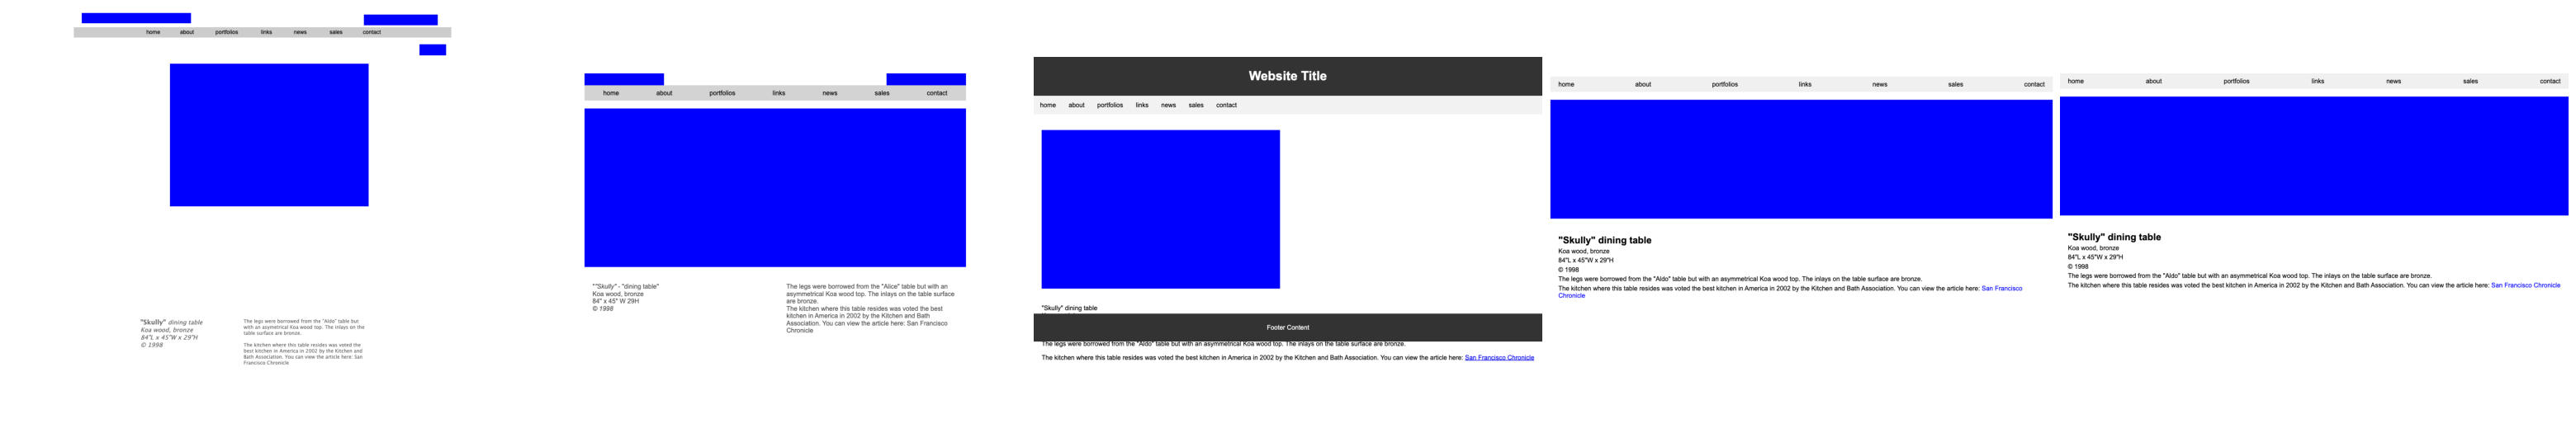

In [4]:
show_images_side_by_side((os.path.join(reference_dir, "2.png"), os.path.join(websight_predictions_dir, "2.png"), os.path.join(direct_prompting_predictions_dir, "2.png"), os.path.join(text_augmented_prompting_predictions_dir, "2.png"), os.path.join(revision_prompting_predictions_dir, "2.png")), border_color='white', border_width=0.01)

16635.html
websight score:  0.5022016084181657

Size Score 0.575477779945542
Matched Text Score 0.9900886591647374
Position Score 0.8791742604817459
Text Color Score 0.9186791006408415
CLIP Score 0.6923903226852417
--------------------------------

direct prompting score:  0.4706815518831319

Size Score 0.6144975358175913
Matched Text Score 0.9989811512990321
Position Score 0.9352804791284756
Text Color Score 0.7476056227536886
CLIP Score 0.5691196322441101
--------------------------------

text augmented prompting score:  0.4379440485043936

Size Score 0.5450381290875315
Matched Text Score 0.9989811512990321
Position Score 0.8944456223573349
Text Color Score 0.7748953952854983
CLIP Score 0.6699604988098145
--------------------------------

revision prompting score:  0.5171828770728655

Size Score 0.6217609395369332
Matched Text Score 0.9989811512990321
Position Score 0.9308963389360508
Text Color Score 0.7748953952854983
CLIP Score 0.5980477929115295
--------------------------------



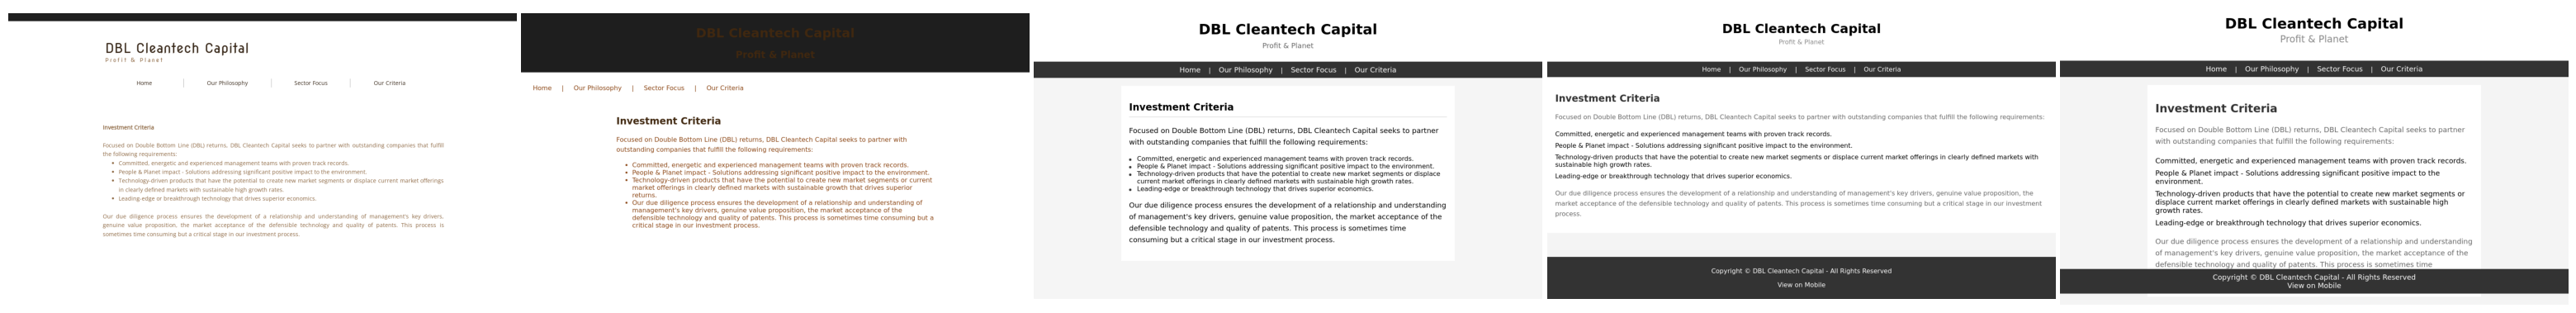

8512.html
websight score:  3.2488260762335774e-05

Size Score 0.0006054137803445923
Matched Text Score 0.3167030418726781
Position Score 0.6193156675195985
Text Color Score 0.8702613614102296
CLIP Score 0.6699714064598083
--------------------------------

direct prompting score:  0.20234707415580924

Size Score 0.2762479694542738
Matched Text Score 0.7738333067184544
Position Score 0.8914282663068956
Text Color Score 0.8953925095263576
CLIP Score 0.7812860012054443
--------------------------------

text augmented prompting score:  0.13306650253270103

Size Score 0.27183163874063637
Matched Text Score 0.9346498219155542
Position Score 0.9203217225986552
Text Color Score 0.8565372202889335
CLIP Score 0.8954508304595947
--------------------------------

revision prompting score:  0.1493621922774179

Size Score 0.3138031636074871
Matched Text Score 0.9017213303362555
Position Score 0.7417184590739313
Text Color Score 0.8255894206126255
CLIP Score 0.6907470226287842
------------------------

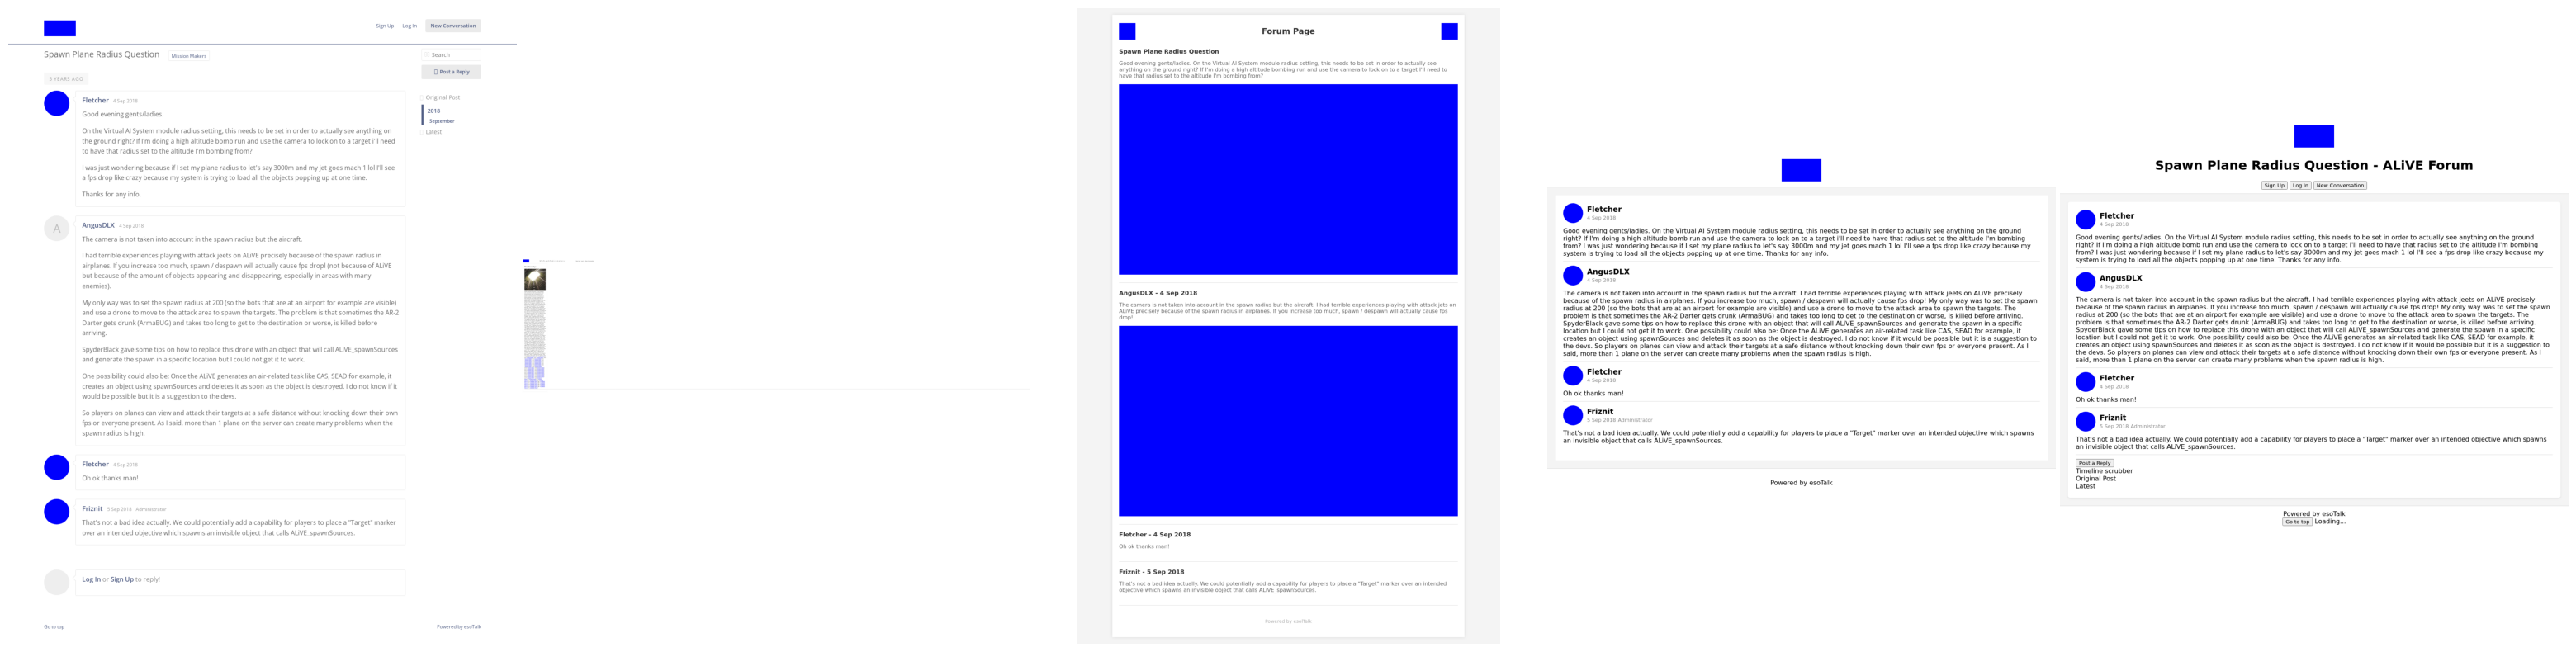

13775.html
websight score:  0.5116595261157523

Size Score 0.6091064372938487
Matched Text Score 0.8630511172961575
Position Score 0.9013058449846234
Text Color Score 0.9354176118411098
CLIP Score 0.8861806988716125
--------------------------------

direct prompting score:  0.31426411335511867

Size Score 0.4470767314884676
Matched Text Score 0.8904761904761905
Position Score 0.8057501553059417
Text Color Score 0.794577005877407
CLIP Score 0.8164132237434387
--------------------------------

text augmented prompting score:  0.47408022898230473

Size Score 0.7051164688994496
Matched Text Score 0.9056737588652483
Position Score 0.8255770998535337
Text Color Score 0.8124748373878975
CLIP Score 0.8062582612037659
--------------------------------

revision prompting score:  0.21321070856902222

Size Score 0.3179892563758433
Matched Text Score 0.7677629559982501
Position Score 0.7878059954649097
Text Color Score 0.7834931631896571
CLIP Score 0.7856749296188354
-------------------------------

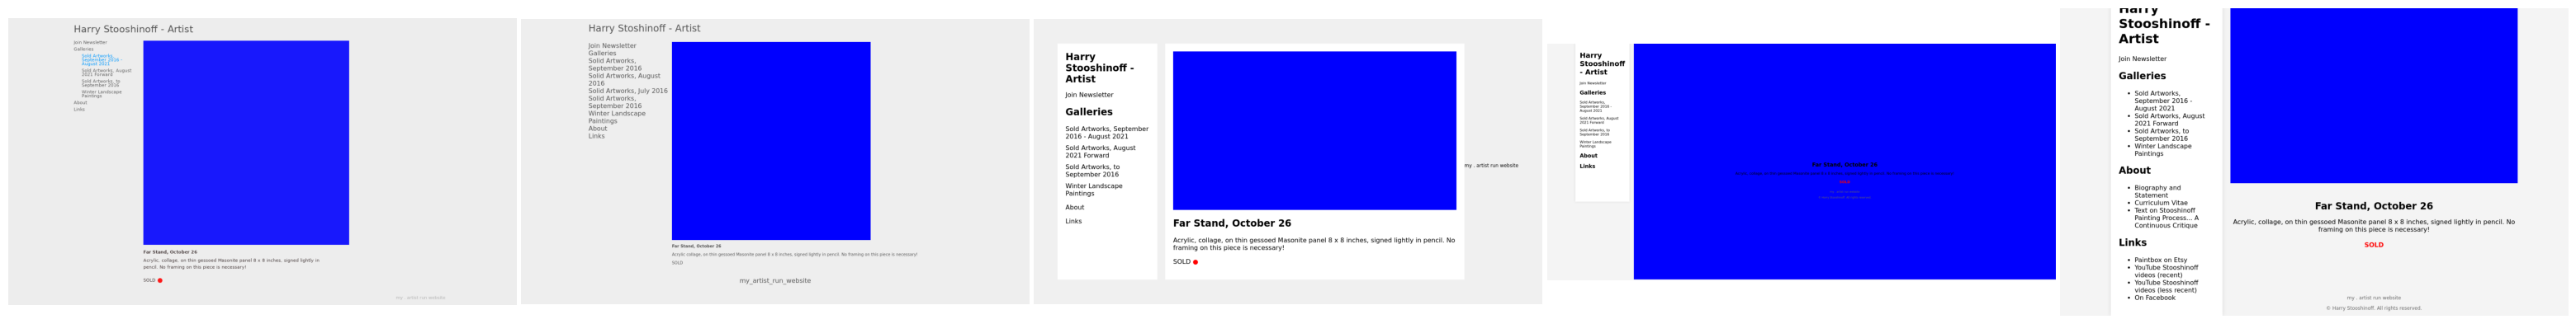

In [5]:
def print_multi_score(multi_score):
    final_size_score, final_matched_text_score, final_position_score, final_text_color_score, final_clip_score = multi_score
    print()
    print("Size Score", final_size_score)
    print("Matched Text Score", final_matched_text_score)
    print("Position Score", final_position_score)
    print("Text Color Score", final_text_color_score)
    print("CLIP Score", final_clip_score)
    print("--------------------------------\n")

debug = False

for filename in ["16635.html", "8512.html", "13775.html"]:
    print(filename)

    ## websight score 
    matched, final_score, multi_score = visual_eval_v2(os.path.join(websight_predictions_dir, filename.replace(".html", ".png")), os.path.join(reference_dir, filename.replace(".html", ".png")), debug=debug)
    print ("websight score: ", final_score)
    print_multi_score(multi_score)
    
    ## direct prompting score 
    matched, final_score, multi_score = visual_eval_v2(os.path.join(direct_prompting_predictions_dir, filename.replace(".html", ".png")), os.path.join(reference_dir, filename.replace(".html", ".png")), debug=debug)
    print ("direct prompting score: ", final_score)
    print_multi_score(multi_score)

    ## text augmented prompting score
    macthed, final_score, multi_score = visual_eval_v2(os.path.join(text_augmented_prompting_predictions_dir, filename.replace(".html", ".png")), os.path.join(reference_dir, filename.replace(".html", ".png")), debug=debug)
    print ("text augmented prompting score: ", final_score)
    print_multi_score(multi_score)

    ## revision prompting score
    macthed, final_score, multi_score = visual_eval_v2(os.path.join(revision_prompting_predictions_dir, filename.replace(".html", ".png")), os.path.join(reference_dir, filename.replace(".html", ".png")), debug=debug)
    print ("revision prompting score: ", final_score)
    print_multi_score(multi_score)

    show_images_side_by_side((os.path.join(reference_dir, filename.replace(".html", ".png")), os.path.join(websight_predictions_dir, filename.replace(".html", ".png")), os.path.join(direct_prompting_predictions_dir, filename.replace(".html", ".png")), os.path.join(text_augmented_prompting_predictions_dir, filename.replace(".html", ".png")), os.path.join(revision_prompting_predictions_dir, filename.replace(".html", ".png"))), border_color='white', border_width=0.01)